# CLASSIFICAZIONE

In [1]:
# impostazioni principali
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import chardet
import io #Used as buffer
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.preprocessing import power_transform
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cluster import DBSCAN
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.option_context('display.colheader_justify','left')
pd.set_option('display.precision',20)

### Import pydotplus e graphviz ma non riesco ad usarli

In [2]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Users/Username/Anaconda3/Library/bin/graphviz'
from sklearn import tree
from IPython.display import Image

In [3]:
pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pydotplus

In [5]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import graphviz
from graphviz import Digraph

## Data preparation

In [7]:
df = pd.read_csv(r'file:/Users/AlessandroVavala/Desktop/Alessandro/Università/UniPi/Data Mining/DatasetProject1/Train_HR_Employee_Attrition.csv')
df1 = pd.read_csv(r'file:/Users/AlessandroVavala/Desktop/Alessandro/Università/UniPi/Data Mining/DatasetProject1/Test_HR_Employee_Attrition.csv')

In [8]:
#df = pd.concat([data,data1] , ignore_index=True)

In [9]:
#MonthlyIncome
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df.groupby('JobRole')['MonthlyIncome'].transform('mean'))
#Age
df['Age'] = df['Age'].fillna(df.groupby('JobRole')['Age'].transform('mean'))
#Over18
df["Over18"].fillna("Y", inplace = True) 
#Gender
df["Gender"].fillna("Male", inplace = True)
#BusinessTravel
df["BusinessTravel"].fillna("Travel_Rarely", inplace = True)
#StandardHours
df["StandardHours"].fillna(float("80.0"), inplace = True)
#PerformanceRating
df['PerformanceRating'] = df.groupby(['JobRole'], sort=False)['PerformanceRating'].apply(lambda x: x.fillna(x.mode().iloc[0])) 
#TRAININGLASTYEAR
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].fillna(df.groupby('JobRole')['TrainingTimesLastYear'].transform('mean'))
#YEARS AT COMPANY
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df.groupby('JobRole')['YearsAtCompany'].transform('mean'))
df.round({"Age" : 0 , "MonthlyIncome": 2 , "TrainingTimesLastYear" : 0 , "YearsAtCompany" : 0  })

Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0     52.0        No      Travel_Rarely        593  Research & Development                 9          4           Medical                        2    Male          88               3         3      Research Director                3        Single         8446.0        13782                   9      Y       No                 17                3.0                         3           80.0                 0                 20                    2.0                2             8.0                   7                        2                    13
1     36.0        No      Travel_Rarely       1218  Research & Development                 1          1     Life Sciences                        2    Male          52               3         5                Manager                3      Divorced         4834.0         8213                   1      Y      Yes                 14                3.0                         3           80.0                 1                 21                    3.0                3             1.0                   8                        1                     6
2     37.0        No  Travel_Frequently        530                   Sales                16          3     Life Sciences                        3    Male          36               3         2        Sales Executive                4      Divorced         4768.0        16130                   1      Y      Yes                 25                3.0                         3           80.0                 1                  7                    4.0                3             1.0                   5                        1                     2
3     33.0        No      Travel_Rarely        953  Research & Development                 5          4  Technical Degree                        2    Male          65               3         1     Research Scientist                2        Single         2799.0        17674                   2      Y       No                 14                3.0                         2           80.0                 0                 12                    1.0                3             3.0                   7                        0                     7
4     37.0        No      Travel_Rarely       1380  Research & Development                 9          2     Life Sciences                        3  Female          75               3         1  Laboratory Technician                4        Single         7978.0         6319                   1      Y       No                 12                3.0                         3           80.0                 0                  2                    3.0                3            10.0                   2                        2                     1
...    ...       ...                ...        ...                     ...               ...        ...               ...                      ...     ...         ...             ...       ...                    ...              ...           ...            ...          ...                 ...    ...      ...                ...                ...                       ...            ...               ...                ...                    ...              ...             ...                 ...                      ...                   ...
1171  37.0        No      Travel_Rarely       1123  Research & Development                16          2           Medical                        4  Female   

In [10]:
df1

Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0    27.0       Yes  Travel_Frequently        763                   Sales                15          2           Medical                        1    Male          59               1         2         Sales Executive                4      Divorced         4298.0        22098                   6      Y      Yes                 14                3.0                         4           80.0                 2                  7                    1.0                2             2.0                   2                        2                     2
1    30.0       Yes      Travel_Rarely       1079                   Sales                16          4         Marketing                        1    Male          70               3         3         Sales Executive                3       Married         5304.0        19002                   2      Y       No                 13                4.0                         1            NaN                 3                 10                    2.0                3             8.0                   0                        0                     0
2    56.0        No         Non-Travel        150  Research & Development                 2          4  Technical Degree                        4    Male          60               3         2  Manufacturing Director                4      Divorced         6306.0        17433                   2      Y       No                 11                4.0                         3           80.0                 1                 12                    2.0                2            13.0                   3                        1                     4
3    41.0       Yes                NaN        359         Human Resources                18          5   Human Resources                        4    Male          89               4         1         Human Resources                1       Married         6430.0        21495                   0      Y       No                 17                3.0                         3           80.0                 0                  2                    4.0                3             3.0                   0                        0                     0
4    42.0        No                NaN        642  Research & Development                 1          3     Life Sciences                        4    Male          76               3         1      Research Scientist                4       Married         2766.0        21412                   3      Y       No                 22                4.0                         1            NaN                 1                 12                    6.0                3             5.0                   3                        1                     0
..    ...       ...                ...        ...                     ...               ...        ...               ...                      ...     ...         ...             ...       ...                     ...              ...           ...            ...          ...                 ...    ...      ...                ...                ...                       ...            ...               ...                ...                    ...              ...             ...                 ...                      ...                   ...
289  38.0        No      Travel_Rarely        890                   Sales                 2          3         Marketing                        4    Male   

In [11]:
#MonthlyIncome
df1['MonthlyIncome'] = df1['MonthlyIncome'].fillna(df1.groupby('JobRole')['MonthlyIncome'].transform('mean'))
#Age
df1['Age'] = df1['Age'].fillna(df1.groupby('JobRole')['Age'].transform('mean'))
#Over18
df1["Over18"].fillna("Y", inplace = True) 
#Gender
df1["Gender"].fillna("Male", inplace = True)
#BusinessTravel
df1["BusinessTravel"].fillna("Travel_Rarely", inplace = True)
#StandardHours
df1["StandardHours"].fillna(float("80.0"), inplace = True)
#PerformanceRating
df1['PerformanceRating'] = df1.groupby(['JobRole'], sort=False)['PerformanceRating'].apply(lambda x: x.fillna(x.mode().iloc[0])) 
#TRAININGLASTYEAR
df1['TrainingTimesLastYear'] = df1['TrainingTimesLastYear'].fillna(df.groupby('JobRole')['TrainingTimesLastYear'].transform('mean'))
#YEARS AT COMPANY
df1['YearsAtCompany'] = df1['YearsAtCompany'].fillna(df1.groupby('JobRole')['YearsAtCompany'].transform('mean'))
df1.round({"Age" : 0 , "MonthlyIncome": 2 , "TrainingTimesLastYear" : 0 , "YearsAtCompany" : 0  })

Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0    27.0       Yes  Travel_Frequently        763                   Sales                15          2           Medical                        1    Male          59               1         2         Sales Executive                4      Divorced         4298.0        22098                   6      Y      Yes                 14                3.0                         4           80.0                 2                  7                    1.0                2             2.0                   2                        2                     2
1    30.0       Yes      Travel_Rarely       1079                   Sales                16          4         Marketing                        1    Male          70               3         3         Sales Executive                3       Married         5304.0        19002                   2      Y       No                 13                4.0                         1           80.0                 3                 10                    2.0                3             8.0                   0                        0                     0
2    56.0        No         Non-Travel        150  Research & Development                 2          4  Technical Degree                        4    Male          60               3         2  Manufacturing Director                4      Divorced         6306.0        17433                   2      Y       No                 11                4.0                         3           80.0                 1                 12                    2.0                2            13.0                   3                        1                     4
3    41.0       Yes      Travel_Rarely        359         Human Resources                18          5   Human Resources                        4    Male          89               4         1         Human Resources                1       Married         6430.0        21495                   0      Y       No                 17                3.0                         3           80.0                 0                  2                    4.0                3             3.0                   0                        0                     0
4    42.0        No      Travel_Rarely        642  Research & Development                 1          3     Life Sciences                        4    Male          76               3         1      Research Scientist                4       Married         2766.0        21412                   3      Y       No                 22                4.0                         1           80.0                 1                 12                    6.0                3             5.0                   3                        1                     0
..    ...       ...                ...        ...                     ...               ...        ...               ...                      ...     ...         ...             ...       ...                     ...              ...           ...            ...          ...                 ...    ...      ...                ...                ...                       ...            ...               ...                ...                    ...              ...             ...                 ...                      ...                   ...
289  38.0        No      Travel_Rarely        890                   Sales                 2          3         Marketing                        4    Male   

In [12]:
#OUTLIERS FOR MonthlyIncome
"""SD MonthlyIncome"""
MonthlyIncome_std = df ['MonthlyIncome'].std()
MonthlyIncome_std
"""MEAN MonthlyIncome"""
MonthlyIncome_mean = df ['MonthlyIncome'].mean()
MonthlyIncome_mean
threshold = 3
outlier = [] 
for i in df ['MonthlyIncome']: 
    z = (i-MonthlyIncome_mean)/MonthlyIncome_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.MonthlyIncome.isin(outlier)]

#OUTLIERS FOR TotalWorkingYears
"""SD TotalWorkingYears"""
TotalWorkingYears_std = df ['TotalWorkingYears'].std()
"""MEAN TotalWorkingYears"""
TotalWorkingYears_mean = df ['TotalWorkingYears'].mean()
threshold = 3
outlier = [] 
for i in df ['TotalWorkingYears']: 
    z = (i-TotalWorkingYears_mean)/TotalWorkingYears_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.TotalWorkingYears.isin(outlier)]

#OUTLIERS FOR YearsAtCompany
"""SD YearsAtCompany"""
YearsAtCompany_std = df ['YearsAtCompany'].std()
"""MEAN YearsAtCompany"""
YearsAtCompany_mean = df ['YearsAtCompany'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsAtCompany']: 
    z = (i-YearsAtCompany_mean)/YearsAtCompany_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsAtCompany.isin(outlier)]

#OUTLIERS FOR YearsInCurrentRole
"""SD YearsInCurrentRole"""
YearsInCurrentRole_std = df ['YearsInCurrentRole'].std()
"""MEAN YearsInCurrentRole"""
YearsInCurrentRole_mean = df ['YearsInCurrentRole'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsInCurrentRole']: 
    z = (i-YearsInCurrentRole_mean)/YearsInCurrentRole_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsInCurrentRole.isin(outlier)]
 
#OUTLIERS FOR YearsSinceLastPromotion
"""SD YearsSinceLastPromotion"""
YearsSinceLastPromotion_std = df ['YearsSinceLastPromotion'].std()
"""MEAN YearsSinceLastPromotion"""
YearsSinceLastPromotion_mean = df ['YearsSinceLastPromotion'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsSinceLastPromotion']: 
    z = (i-YearsSinceLastPromotion_mean)/YearsSinceLastPromotion_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsSinceLastPromotion.isin(outlier)]
 
#OUTLIERS FOR YearsWithCurrManager
"""SD YearsWithCurrManager"""
YearsWithCurrManager_std = df ['YearsWithCurrManager'].std()
"""MEAN YearsWithCurrManager"""
YearsWithCurrManager_mean = df ['YearsWithCurrManager'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsWithCurrManager']: 
    z = (i-YearsWithCurrManager_mean)/YearsWithCurrManager_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsWithCurrManager.isin(outlier)]

In [13]:
#OUTLIERS FOR MonthlyIncome
"""SD MonthlyIncome"""
MonthlyIncome_std = df1 ['MonthlyIncome'].std()
MonthlyIncome_std
"""MEAN MonthlyIncome"""
MonthlyIncome_mean = df1 ['MonthlyIncome'].mean()
MonthlyIncome_mean
threshold = 3
outlier = [] 
for i in df1 ['MonthlyIncome']: 
    z = (i-MonthlyIncome_mean)/MonthlyIncome_std 
    if z >= threshold: 
        outlier.append(i)
        df1 = df1[~df1.MonthlyIncome.isin(outlier)]

#OUTLIERS FOR TotalWorkingYears
"""SD TotalWorkingYears"""
TotalWorkingYears_std = df1 ['TotalWorkingYears'].std()
"""MEAN TotalWorkingYears"""
TotalWorkingYears_mean = df1 ['TotalWorkingYears'].mean()
threshold = 3
outlier = [] 
for i in df1 ['TotalWorkingYears']: 
    z = (i-TotalWorkingYears_mean)/TotalWorkingYears_std 
    if z >= threshold: 
        outlier.append(i)
        df1 = df1[~df1.TotalWorkingYears.isin(outlier)]

#OUTLIERS FOR YearsAtCompany
"""SD YearsAtCompany"""
YearsAtCompany_std = df1 ['YearsAtCompany'].std()
"""MEAN YearsAtCompany"""
YearsAtCompany_mean = df1 ['YearsAtCompany'].mean()
threshold = 3
outlier = [] 
for i in df1 ['YearsAtCompany']: 
    z = (i-YearsAtCompany_mean)/YearsAtCompany_std 
    if z >= threshold: 
        outlier.append(i) 
        df1 = df1[~df1.YearsAtCompany.isin(outlier)]

#OUTLIERS FOR YearsInCurrentRole
"""SD YearsInCurrentRole"""
YearsInCurrentRole_std = df1 ['YearsInCurrentRole'].std()
"""MEAN YearsInCurrentRole"""
YearsInCurrentRole_mean = df1 ['YearsInCurrentRole'].mean()
threshold = 3
outlier = [] 
for i in df1 ['YearsInCurrentRole']: 
    z = (i-YearsInCurrentRole_mean)/YearsInCurrentRole_std 
    if z >= threshold: 
        outlier.append(i) 
        df1 = df1[~df1.YearsInCurrentRole.isin(outlier)]
 
#OUTLIERS FOR YearsSinceLastPromotion
"""SD YearsSinceLastPromotion"""
YearsSinceLastPromotion_std = df1 ['YearsSinceLastPromotion'].std()
"""MEAN YearsSinceLastPromotion"""
YearsSinceLastPromotion_mean = df1 ['YearsSinceLastPromotion'].mean()
threshold = 3
outlier = [] 
for i in df1 ['YearsSinceLastPromotion']: 
    z = (i-YearsSinceLastPromotion_mean)/YearsSinceLastPromotion_std 
    if z >= threshold: 
        outlier.append(i) 
        df1 = df1[~df1.YearsSinceLastPromotion.isin(outlier)]
 
#OUTLIERS FOR YearsWithCurrManager
"""SD YearsWithCurrManager"""
YearsWithCurrManager_std = df1 ['YearsWithCurrManager'].std()
"""MEAN YearsWithCurrManager"""
YearsWithCurrManager_mean = df1 ['YearsWithCurrManager'].mean()
threshold = 3
outlier = [] 
for i in df1 ['YearsWithCurrManager']: 
    z = (i-YearsWithCurrManager_mean)/YearsWithCurrManager_std 
    if z >= threshold: 
        outlier.append(i) 
        df1 = df1[~df1.YearsWithCurrManager.isin(outlier)]

In [14]:
print('Numero outlier rimossi: ', 1176 - len(df))
len(df)
print('Numero outlier rimossi: ', 294 - len(df1))
len(df)

Numero outlier rimossi:  97
Numero outlier rimossi:  25


1079

In [15]:
#Convertiamo Attrition 
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No':0})


#Convertiamo Attrition 
df1['Attrition'] = df1['Attrition'].map({'Yes': 1, 'No': 0})
df1['BusinessTravel'] = df1['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df1['OverTime'] = df1['OverTime'].map({'Yes': 1, 'No':0})

In [16]:
df.round({"Age" : 0 , "MonthlyIncome": 2 , "TrainingTimesLastYear" : 0 , "YearsAtCompany" : 0  })

df1.round({"Age" : 0 , "MonthlyIncome": 2 , "TrainingTimesLastYear" : 0 , "YearsAtCompany" : 0  })

Age  Attrition  BusinessTravel  DailyRate              Department  DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0    27.0          1               2        763                   Sales                15          2           Medical                        1    Male          59               1         2         Sales Executive                4      Divorced         4298.0        22098                   6      Y         1                 14                3.0                         4           80.0                 2                  7                    1.0                2             2.0                   2                        2                     2
1    30.0          1               1       1079                   Sales                16          4         Marketing                        1    Male          70               3         3         Sales Executive                3       Married         5304.0        19002                   2      Y         0                 13                4.0                         1           80.0                 3                 10                    2.0                3             8.0                   0                        0                     0
2    56.0          0               0        150  Research & Development                 2          4  Technical Degree                        4    Male          60               3         2  Manufacturing Director                4      Divorced         6306.0        17433                   2      Y         0                 11                4.0                         3           80.0                 1                 12                    2.0                2            13.0                   3                        1                     4
3    41.0          1               1        359         Human Resources                18          5   Human Resources                        4    Male          89               4         1         Human Resources                1       Married         6430.0        21495                   0      Y         0                 17                3.0                         3           80.0                 0                  2                    4.0                3             3.0                   0                        0                     0
4    42.0          0               1        642  Research & Development                 1          3     Life Sciences                        4    Male          76               3         1      Research Scientist                4       Married         2766.0        21412                   3      Y         0                 22                4.0                         1           80.0                 1                 12                    6.0                3             5.0                   3                        1                     0
..    ...        ...             ...        ...                     ...               ...        ...               ...                      ...     ...         ...             ...       ...                     ...              ...           ...            ...          ...                 ...    ...       ...                ...                ...                       ...            ...               ...                ...                    ...              ...             ...                 ...                      ...                   ...
289  38.0          0               1        890                   Sales                 2          3         Marketing                        4    Male          97

In [17]:
df = df.drop(columns = 'StandardHours')
df = df.drop(columns = 'HourlyRate')
df = df.drop(columns = 'DailyRate')
df = df.drop(columns = 'MonthlyRate')
df = df.drop(columns = 'BusinessTravel')
df = df.drop(columns = 'Education')
df = df.drop(columns = 'YearsInCurrentRole')
df = df.drop(columns = 'JobLevel')
df = df.drop(columns = 'Over18')

df


df1 = df1.drop(columns = 'StandardHours')
df1 = df1.drop(columns = 'HourlyRate')
df1 = df1.drop(columns = 'DailyRate')
df1 = df1.drop(columns = 'MonthlyRate')
df1 = df1.drop(columns = 'BusinessTravel')
df1 = df1.drop(columns = 'Education')
df1 = df1.drop(columns = 'YearsInCurrentRole')
df1 = df1.drop(columns = 'JobLevel')
df1 = df1.drop(columns = 'Over18')

df1

Age  Attrition              Department  DistanceFromHome    EducationField  EnvironmentSatisfaction  Gender  JobInvolvement                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager
0    27.0          1                   Sales                15           Medical                        1    Male               1         Sales Executive                4      Divorced         4298.0                   6         1                 14                3.0                         4                 2                  7  1.00000000000000000000                2             2.0                        2                     2
1    30.0          1                   Sales                16         Marketing                        1    Male               3         Sales Executive                3       Married         5304.0                   2         0                 13                4.0                         1                 3                 10  2.00000000000000000000                3             8.0                        0                     0
2    56.0          0  Research & Development                 2  Technical Degree                        4    Male               3  Manufacturing Director                4      Divorced         6306.0                   2         0                 11                4.0                         3                 1                 12  2.00000000000000000000                2            13.0                        1                     4
3    41.0          1         Human Resources                18   Human Resources                        4    Male               4         Human Resources                1       Married         6430.0                   0         0                 17                3.0                         3                 0                  2  4.00000000000000000000                3             3.0                        0                     0
4    42.0          0  Research & Development                 1     Life Sciences                        4    Male               3      Research Scientist                4       Married         2766.0                   3         0                 22                4.0                         1                 1                 12  6.00000000000000000000                3             5.0                        1                     0
..    ...        ...                     ...               ...               ...                      ...     ...             ...                     ...              ...           ...            ...                 ...       ...                ...                ...                       ...               ...                ...                     ...              ...             ...                      ...                   ...
289  38.0          0                   Sales                 2         Marketing                        4    Male               3    Sales Representative                4       Married         8740.0                   1         0                 13                3.0                         1                 0                  2  2.76704545454545502992                3             8.0                        2                     2
290  44.0          0                   Sales                 8     Life Sciences                        3    Male               3         Sales Executive                1       Married         6465.0                   5         0                 17                3.0                         2                 1                  6  5.00000000000000000000                3             4.0                        1                     2
291  30.0          0  Research & Development                24  Technical Degree           

In [18]:
df1.round({"Age" : 0 , "MonthlyIncome": 2 , "TrainingTimesLastYear" : 0 , "YearsAtCompany" : 0  })

Age  Attrition              Department  DistanceFromHome    EducationField  EnvironmentSatisfaction  Gender  JobInvolvement                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager
0    27.0          1                   Sales                15           Medical                        1    Male               1         Sales Executive                4      Divorced         4298.0                   6         1                 14                3.0                         4                 2                  7                    1.0                2             2.0                        2                     2
1    30.0          1                   Sales                16         Marketing                        1    Male               3         Sales Executive                3       Married         5304.0                   2         0                 13                4.0                         1                 3                 10                    2.0                3             8.0                        0                     0
2    56.0          0  Research & Development                 2  Technical Degree                        4    Male               3  Manufacturing Director                4      Divorced         6306.0                   2         0                 11                4.0                         3                 1                 12                    2.0                2            13.0                        1                     4
3    41.0          1         Human Resources                18   Human Resources                        4    Male               4         Human Resources                1       Married         6430.0                   0         0                 17                3.0                         3                 0                  2                    4.0                3             3.0                        0                     0
4    42.0          0  Research & Development                 1     Life Sciences                        4    Male               3      Research Scientist                4       Married         2766.0                   3         0                 22                4.0                         1                 1                 12                    6.0                3             5.0                        1                     0
..    ...        ...                     ...               ...               ...                      ...     ...             ...                     ...              ...           ...            ...                 ...       ...                ...                ...                       ...               ...                ...                    ...              ...             ...                      ...                   ...
289  38.0          0                   Sales                 2         Marketing                        4    Male               3    Sales Representative                4       Married         8740.0                   1         0                 13                3.0                         1                 0                  2                    3.0                3             8.0                        2                     2
290  44.0          0                   Sales                 8     Life Sciences                        3    Male               3         Sales Executive                1       Married         6465.0                   5         0                 17                3.0                         2                 1                  6                    5.0                3             4.0                        1                     2
291  30.0          0  Research & Development                24  Technical Degree                    

In [19]:
#data = pd.concat([df,df1] , ignore_index=True)

In [20]:
dk = df.copy()
label_encoders = dict()
column2encode = ["Department" , "EducationField" , "Gender" , "JobRole" , "MaritalStatus"]

for col in column2encode:
    le = LabelEncoder()
    dk[col] = le.fit_transform(dk[col])
    label_encoders[col] = le

In [21]:
dk1 = df1.copy()
label_encoders = dict()
column2encode = ["Department" , "EducationField" , "Gender" , "JobRole" , "MaritalStatus"]

for col in column2encode:
    le = LabelEncoder()
    dk1[col] = le.fit_transform(dk1[col])
    label_encoders[col] = le

In [22]:
#dk1

#### funzioni prese dal file del Titanic, servono per fare un riassunto dei parametri migliori

In [23]:
def report(results, n_top=3):
    md = []
    ms = []
    ml = []
    cr = []
    mean = []
    std = []
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            mean.append( results['mean_test_score'][candidate])
            std.append(results['std_test_score'][candidate])
            ms.append(random_search.cv_results_['params'][candidate]['min_samples_split'])
            ml.append(random_search.cv_results_['params'][candidate]['min_samples_leaf'])
            cr.append(random_search.cv_results_['params'][candidate]['criterion'])
            md.append(random_search.cv_results_['params'][candidate]['max_depth'])
    dres = pd.DataFrame()
    dres['Mean Test Score'] = mean
    dres['Standard Deviation Test Score'] = std
    dres['Min Sample Leaf'] = ml
    dres['Min Sample Split'] = ms
    dres['Criterion'] = cr
    dres['Max Depth'] = md
    return dres

def report_verbose(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Model with rank: {0}".format(i))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [24]:
data = pd.concat([dk,dk1] , ignore_index=True)
data

Age  Attrition  Department  DistanceFromHome  EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager
0     52.00000000000000000000          0           1                 9               3                        2       1               3        5                3              2         8446.0                   9         0                 17                3.0                         3                 0                 20  2.00000000000000000000                2             8.0                        2                    13
1     36.00000000000000000000          0           1                 1               1                        2       1               3        3                3              0         4834.0                   1         1                 14                3.0                         3                 1                 21  3.00000000000000000000                3             1.0                        1                     6
2     36.67441860465116576506          0           2                16               1                        3       1               3        7                4              0         4768.0                   1         1                 25                3.0                         3                 1                  7  4.00000000000000000000                3             1.0                        1                     2
3     33.00000000000000000000          0           1                 5               5                        2       1               3        6                2              2         2799.0                   2         0                 14                3.0                         2                 0                 12  1.00000000000000000000                3             3.0                        0                     7
4     37.41758241758241609887          0           1                 9               1                        3       0               3        2                4              2         7978.0                   1         0                 12                3.0                         3                 0                  2  2.76704545454545458583                3            10.0                        2                     1
...                       ...        ...         ...               ...             ...                      ...     ...             ...      ...              ...            ...            ...                 ...       ...                ...                ...                       ...               ...                ...                     ...              ...             ...                      ...                   ...
1343  38.00000000000000000000          0           2                 2               2                        4       1               3        8                4              1         8740.0                   1         0                 13                3.0                         1                 0                  2  2.76704545454545502992                3             8.0                        2                     2
1344  44.00000000000000000000          0           2                 8               1                        3       1               3        7                1              1         6465.0                   5         0                 17                3.0                         2                 1                  6  5.00000000000000000000                3             4.0                        1                     2
1345  30.00000000000000000000          0           1                24               5                        4       1               3        4                4              2       

#### Split 

In [25]:
attributes = [col for col in data.columns if col != 'Attrition']
X = data[attributes].values
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=42, stratify=y)

In [26]:
'''attributes = [col for col in data.columns if col != 'Attrition']
X = data[attributes].values
y = data['Attrition']

X_train, y_train = (X, y)'''

"attributes = [col for col in data.columns if col != 'Attrition']\nX = data[attributes].values\ny = data['Attrition']\n\nX_train, y_train = (X, y)"

In [27]:
'''attributes = [col for col in dk1.columns if col != 'Attrition']
X1 = dk1[attributes].values
y1 = dk1['Attrition']

X_test, y_test = (X1, y1)'''

"attributes = [col for col in dk1.columns if col != 'Attrition']\nX1 = dk1[attributes].values\ny1 = dk1['Attrition']\n\nX_test, y_test = (X1, y1)"

In [28]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(899, 23)
(449, 23)
(899,)
(449,)


In [29]:
print('y_train class distribution')
print(y_train.value_counts(normalize=True))

print('y_test class distribution')
print(y_test.value_counts(normalize=True))

y_train class distribution
0    0.82981090100111232211
1    0.17018909899888765014
Name: Attrition, dtype: float64
y_test class distribution
0    0.83073496659242762608
1    0.16926503340757237392
Name: Attrition, dtype: float64


In [30]:
param_list = {'max_depth': [None] + list(np.arange(2, 50)),
              'min_samples_split': [10, 20, 30, 40, 50, 60, 90, 100, 110, 120, 130, 140, 150],
              'min_samples_leaf': [10, 20, 30, 40, 50, 60, 90, 100, 110, 120, 130, 140, 150],
              'criterion': ['gini', 'entropy'],
             }

dtc = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, random_state=123)

cvs = []
results = []

random_search = RandomizedSearchCV(dtc, param_distributions=param_list, n_iter=100, cv = skf)

random_search.fit(X, y)
dres = pd.DataFrame
dres = report(random_search.cv_results_, n_top=20).copy()
report_verbose(random_search.cv_results_, n_top=3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Model with rank: 1
Mean validation score: 0.844 (std: 0.009)
Model with rank: 1
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 60, 'max_depth': 26, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.844 (std: 0.009)
Model with rank: 1
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 60, 'max_depth': 18, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.844 (std: 0.009)
Model with rank: 1
Parameters: {'min_samples_split': 40, 'min_samples_leaf': 60, 'max_depth': 28, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.844 (std: 0.009)
Model with rank: 1
Parameters: {'min_samples_split': 120, 'min_samples_leaf': 60, 'max_depth': 20, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.844 (std: 0.009)
Model with rank: 1
Parameters: {'min_samples_split': 150, 'min_samples_leaf': 60, 'max_depth': 24, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.844 (std: 0.009)
Model with rank:

In [31]:
#parametri migliori
dres.sort_values(by='Mean Test Score' , ascending = False).head(10)

Mean Test Score  Standard Deviation Test Score  Min Sample Leaf  Min Sample Split Criterion  Max Depth
0  0.84420674405749029923         0.00947730684407885500               60                30   entropy         26
1  0.84420674405749029923         0.00947730684407885500               60               100   entropy         18
2  0.84420674405749029923         0.00947730684407885500               60                40   entropy         28
3  0.84420674405749029923         0.00947730684407885500               60               120   entropy         20
4  0.84420674405749029923         0.00947730684407885500               60               150   entropy         24
5  0.84420674405749029923         0.00947730684407885500               60               140   entropy         23
6  0.84420674405749029923         0.00947730684407885500               60               150   entropy         33
7  0.84420674405749029923         0.00947730684407885500               60               120   entropy         47
8  0.83977335544499731590         0.00869283901777870467               20               110   entropy         37
9  0.83903261470425649637         0.01032014537894257455               50               100   entropy          3

#### Grafici per capire il comportamento di media e devizione standard. In teoria quando la media aumenta la deviazione standard diminuisce

Text(0.5, 0, 'Min Sample Leaf')

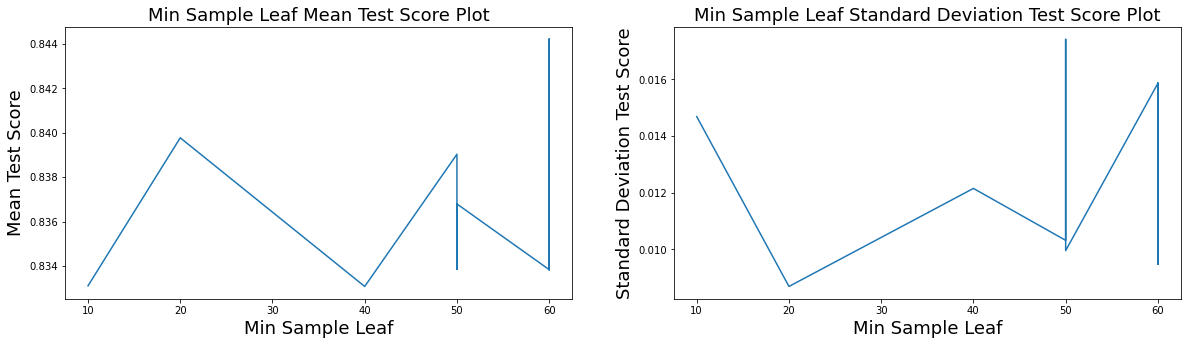

In [32]:
#Mean Test Score	Standard Deviation Test Score	Min Sample Leaf	Min Sample Split	Criterion	Max Depth

fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

# Plot gender
plt.subplot2grid(fig_dims, (0, 0))
dres.sort_values(by='Min Sample Leaf', ascending=False).set_index('Min Sample Leaf')['Mean Test Score'].plot(kind='line')
plt.title('Min Sample Leaf Mean Test Score Plot', fontsize = 18)
plt.ylabel('Mean Test Score', fontsize = 18)
plt.xlabel('Min Sample Leaf', fontsize = 18)

plt.subplot2grid(fig_dims, (0, 1))
dres.sort_values(by='Min Sample Leaf', ascending=False).set_index('Min Sample Leaf')['Standard Deviation Test Score'].plot(kind='line')
plt.title('Min Sample Leaf Standard Deviation Test Score Plot', fontsize = 18)
plt.ylabel('Standard Deviation Test Score', fontsize = 18)
plt.xlabel('Min Sample Leaf', fontsize = 18)

#fig.savefig("Latex/images/min_sample_leaf")

Text(0.5, 0, 'Min Sample Split')

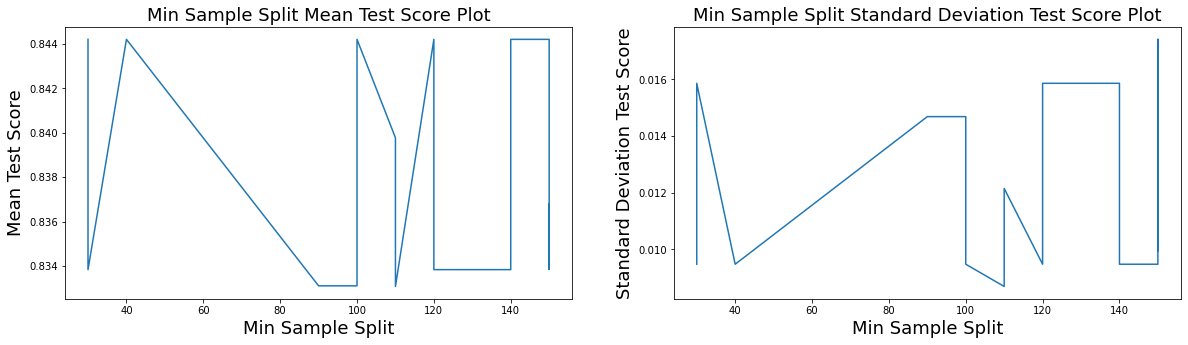

In [33]:
#Mean Test Score	Standard Deviation Test Score	Min Sample Leaf	Min Sample Split	Criterion	Max Depth

fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

# Plot gender
plt.subplot2grid(fig_dims, (0, 0))
dres.sort_values(by='Min Sample Split', ascending=False).set_index('Min Sample Split')['Mean Test Score'].plot(kind='line', title='Gender')
plt.title('Min Sample Split Mean Test Score Plot', fontsize = 18)
plt.ylabel('Mean Test Score', fontsize = 18)
plt.xlabel('Min Sample Split', fontsize = 18)

plt.subplot2grid(fig_dims, (0, 1))
dres.sort_values(by='Min Sample Split', ascending=False).set_index('Min Sample Split')['Standard Deviation Test Score'].plot(kind='line', title='Gender')
plt.title('Min Sample Split Standard Deviation Test Score Plot', fontsize = 18)
plt.ylabel('Standard Deviation Test Score', fontsize = 18)
plt.xlabel('Min Sample Split', fontsize = 18)

Text(0.5, 0, 'Criterion')

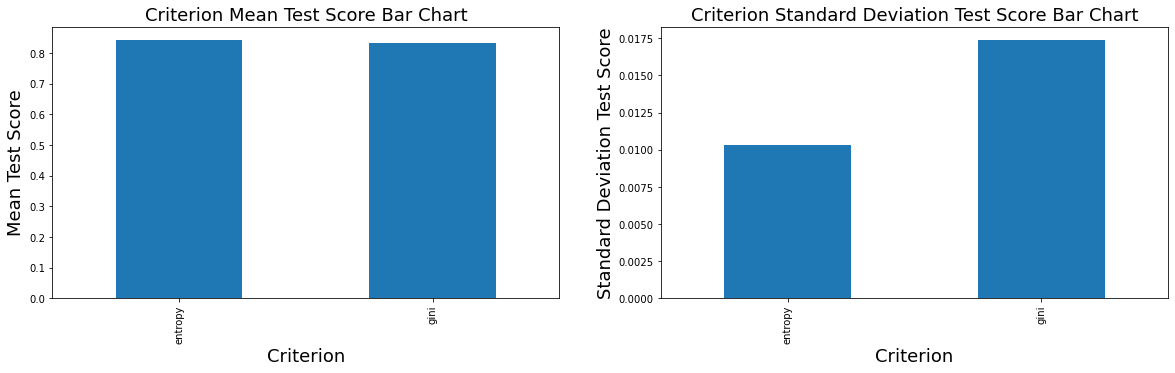

In [34]:
#Mean Test Score	Standard Deviation Test Score	Min Sample Leaf	Min Sample Split	Criterion	Max Depth

fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

# Plot gender
plt.subplot2grid(fig_dims, (0, 0))
#dres.sort_values(by='Criterion', ascending=False).set_index('Criterion')['Mean Test Score'].plot(kind='line', title='Gender')
dres.groupby(['Criterion']).max()['Mean Test Score'].plot(kind='bar')
plt.title('Criterion Mean Test Score Bar Chart', fontsize = 18)
plt.ylabel('Mean Test Score', fontsize = 18)
plt.xlabel('Criterion', fontsize = 18)

plt.subplot2grid(fig_dims, (0, 1))
#dres.sort_values(by='Criterion', ascending=False).set_index('Criterion')['Standard Deviation Test Score'].plot(kind='line', title='Gender')
dres.groupby(['Criterion']).max()['Standard Deviation Test Score'].plot(kind='bar')
plt.title('Criterion Standard Deviation Test Score Bar Chart', fontsize = 18)
plt.ylabel('Standard Deviation Test Score', fontsize = 18)
plt.xlabel('Criterion', fontsize = 18)

Text(0.5, 0, 'Max Depth')

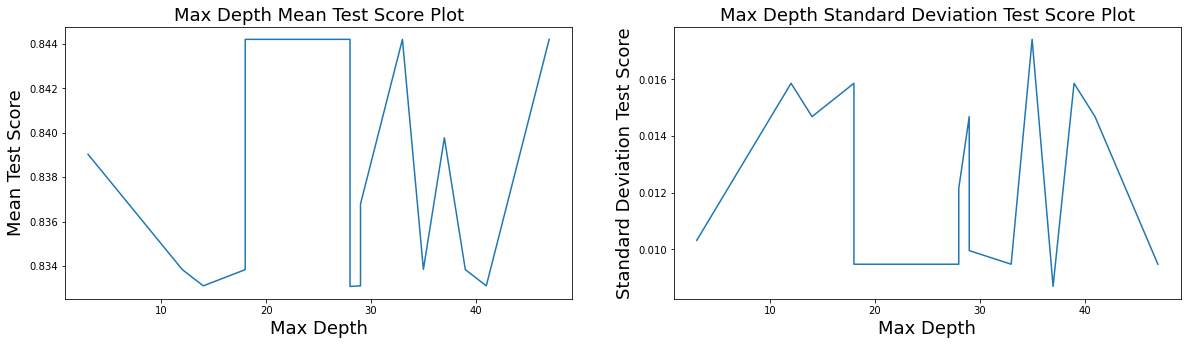

In [35]:
#Mean Test Score	Standard Deviation Test Score	Min Sample Leaf	Min Sample Split	Criterion	Max Depth

fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

# Plot gender
plt.subplot2grid(fig_dims, (0, 0))
dres.sort_values(by='Max Depth', ascending=False).set_index('Max Depth')['Mean Test Score'].plot(kind='line', title='Gender')
plt.title('Max Depth Mean Test Score Plot', fontsize = 18)
plt.ylabel('Mean Test Score', fontsize = 18)
plt.xlabel('Max Depth', fontsize = 18)

plt.subplot2grid(fig_dims, (0, 1))
dres.sort_values(by='Max Depth', ascending=False).set_index('Max Depth')['Standard Deviation Test Score'].plot(kind='line', title='Gender')
plt.title('Max Depth Standard Deviation Test Score Plot', fontsize = 18)
plt.ylabel('Standard Deviation Test Score', fontsize = 18)
plt.xlabel('Max Depth', fontsize = 18)
#fig.savefig("Latex/images/max_depth")

### Perform Clustering

In [36]:
print(random_search.best_estimator_)
dtc = random_search.best_estimator_
#dtc = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=40,
                       #min_samples_split=90)

DecisionTreeClassifier(criterion='entropy', max_depth=26, min_samples_leaf=60,
                       min_samples_split=30)


In [37]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=26, min_samples_leaf=60,
                       min_samples_split=30)

In [38]:
y_pred = dtc.predict(X_test)
y_pred_tr = dtc.predict(X_train)

### Analyze the classification results

#### Features Importance

In [39]:
for col, imp in zip(attributes, dtc.feature_importances_):
    print(col, imp)

Age 0.0
Department 0.0
DistanceFromHome 0.0
EducationField 0.0
EnvironmentSatisfaction 0.0
Gender 0.0
JobInvolvement 0.0
JobRole 0.08977387458593385
JobSatisfaction 0.04566778024332626
MaritalStatus 0.0
MonthlyIncome 0.026417837714154395
NumCompaniesWorked 0.024816156329613565
OverTime 0.38883774110291425
PercentSalaryHike 0.0
PerformanceRating 0.0
RelationshipSatisfaction 0.0
StockOptionLevel 0.08054351901717685
TotalWorkingYears 0.1551082733693998
TrainingTimesLastYear 0.06255032425715583
WorkLifeBalance 0.0
YearsAtCompany 0.0
YearsSinceLastPromotion 0.0
YearsWithCurrManager 0.12628449338032513


Text(0.5, 1.0, 'Decision Tree feature importances')

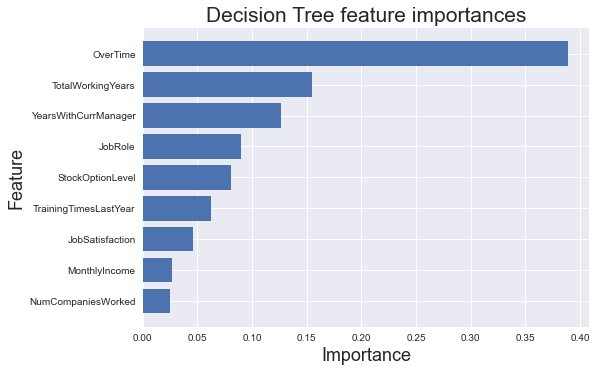

In [40]:
plt.style.use('seaborn')
feature = pd.DataFrame({'Feature_name': attributes, 'Importances' : dtc.feature_importances_})
feature = feature.sort_values('Importances' , ascending = True)
feature = feature[feature['Importances'] > 0.0]
plt.barh (feature['Feature_name'] , feature['Importances'])
plt.xlabel("Importance", size=18)
plt.ylabel("Feature", size=18)
plt.title("Decision Tree feature importances", size=21)

[Text(2098.9583333333335, 2422.2916666666665, 'OverTime <= 0.5\nentropy = 0.658\nsamples = 899\nvalue = [746, 153]\nclass = No Attrition'),
 Text(1291.6666666666667, 1981.875, 'YearsWithCurrManager <= 0.5\nentropy = 0.483\nsamples = 641\nvalue = [574, 67]\nclass = No Attrition'),
 Text(968.75, 1541.4583333333333, 'entropy = 0.779\nsamples = 117\nvalue = [90, 27]\nclass = No Attrition'),
 Text(1614.5833333333335, 1541.4583333333333, 'StockOptionLevel <= 0.5\nentropy = 0.389\nsamples = 524\nvalue = [484, 40]\nclass = No Attrition'),
 Text(968.75, 1101.0416666666665, 'JobSatisfaction <= 3.5\nentropy = 0.542\nsamples = 225\nvalue = [197, 28]\nclass = No Attrition'),
 Text(645.8333333333334, 660.625, 'NumCompaniesWorked <= 1.5\nentropy = 0.637\nsamples = 155\nvalue = [130, 25]\nclass = No Attrition'),
 Text(322.9166666666667, 220.20833333333303, 'entropy = 0.491\nsamples = 84\nvalue = [75, 9]\nclass = No Attrition'),
 Text(968.75, 220.20833333333303, 'entropy = 0.77\nsamples = 71\nvalue = [

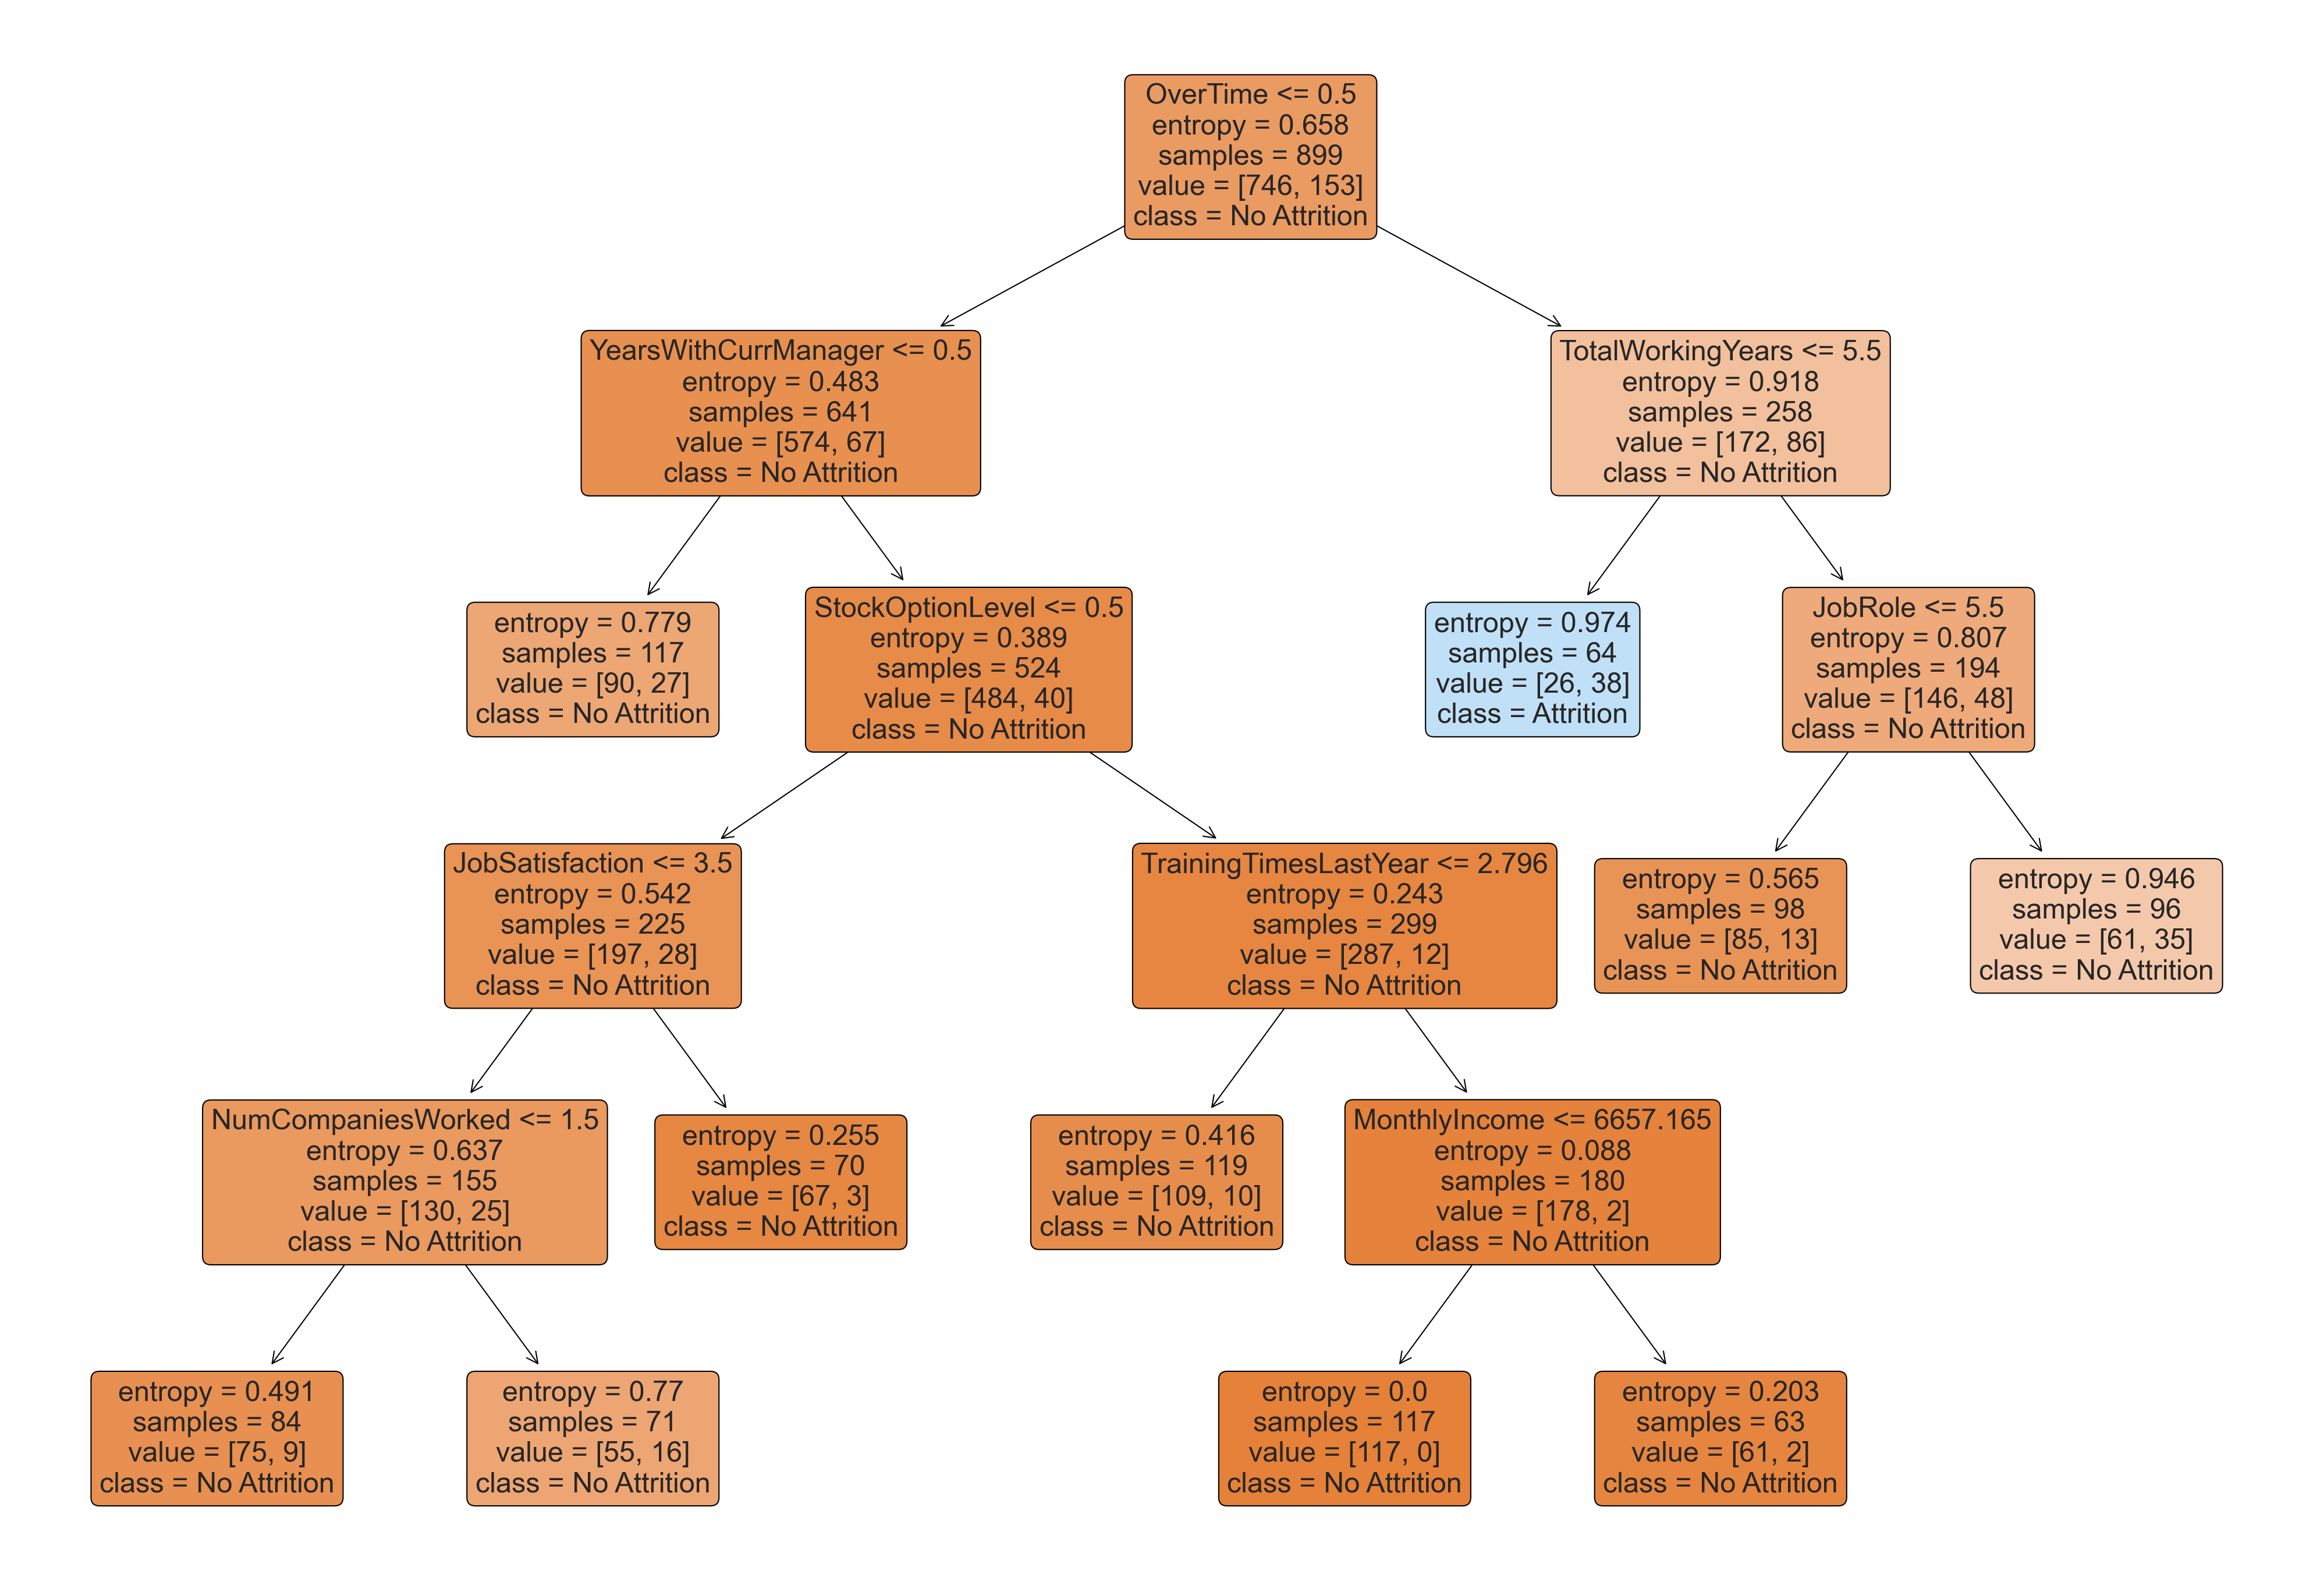

In [41]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,7), dpi=500)
tree.plot_tree(dtc,
                                feature_names=attributes,
                                class_names=['Attrition' if x == 1 else 'No Attrition' for x in dtc.classes_],  
                                filled=True, rounded=True,
                                label = 'all' , max_depth = None, fontsize = 7)

In [42]:
'''###########################
###NON FUNZIONA GRAPHVIZ###
###########################
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=['Attrition' if x == 1 else 'No Attrition' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())'''

"###########################\n###NON FUNZIONA GRAPHVIZ###\n###########################\ndot_data = tree.export_graphviz(clf, out_file=None,\n                                feature_names=attributes,\n                                class_names=['Attrition' if x == 1 else 'No Attrition' for x in clf.classes_],  \n                                filled=True, rounded=True,  \n                                special_characters=True,\n                                max_depth=3)  \ngraph = pydotplus.graph_from_dot_data(dot_data)  \nImage(graph.create_png())"

In [43]:
from sklearn.tree import export_graphviz

# Export as dot file
dot_data = export_graphviz(dtc, out_file='tree.dot',
                                feature_names=attributes,
                                class_names=['Attrition' if x == 1 else 'No Attrition' for x in dtc.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=None)

In [44]:
graph = pydotplus.graph_from_dot_data(dot_data)  
img = Image(graph.create_png())

TypeError: object of type 'NoneType' has no len()

In [ ]:
dot -Tpng 'tree.dot' -o 'tree.png'    (PNG format)

In [ ]:
#Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree(9).png')

### Analyze the classification performance

I CODICI COMMENTATI SONO PRESI DA DAL NOTEBOOK DI IRIS

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [46]:
y_pred = dtc.predict(X_train)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

Accuracy 0.8431590656284761
F1-score [0.91081594 0.35023041]


In [47]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       746
           1       0.59      0.25      0.35       153

    accuracy                           0.84       899
   macro avg       0.73      0.61      0.63       899
weighted avg       0.82      0.84      0.82       899



In [48]:
confusion_matrix(y_train, y_pred)

array([[720,  26],
       [115,  38]])

In [49]:
y_pred = dtc.predict(X_test)

In [50]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.8329621380846325
F1-score [0.90613267 0.24242424]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       373
           1       0.52      0.16      0.24        76

    accuracy                           0.83       449
   macro avg       0.69      0.56      0.57       449
weighted avg       0.79      0.83      0.79       449



array([[362,  11],
       [ 64,  12]])

In [51]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))



print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Train Accuracy 0.8431590656284761
Train F1-score [0.91081594 0.35023041]
Test Accuracy 0.8329621380846325
Test F1-score [0.90613267 0.24242424]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       373
           1       0.52      0.16      0.24        76

    accuracy                           0.83       449
   macro avg       0.69      0.56      0.57       449
weighted avg       0.79      0.83      0.79       449



array([[362,  11],
       [ 64,  12]])

In [52]:
def conf_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7,7))
    plot_confusion_matrix(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Confusion Matrix - score: ' + str(accuracy_score(y_test,y_pred))
    plt.title(all_sample_title, size = 15);
    plt.show()
    print(classification_report(y_test,y_pred))
conf_matrix(y_test,y_pred)


NameError: name 'plot_confusion_matrix' is not defined

<Figure size 504x504 with 0 Axes>

In [53]:
fpr1, tpr1, _ = roc_curve(y_test, y_pred)
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)

roc_auc1 = roc_auc_score(y_test, y_pred, average=None)

0.5642020601100607


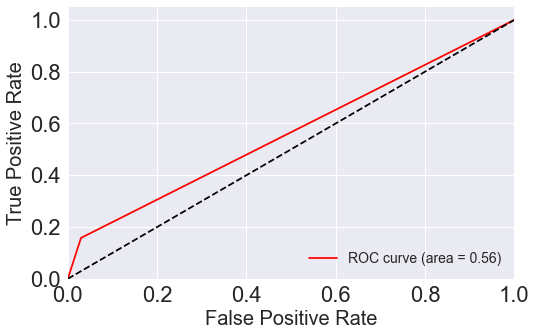

In [54]:
plt.figure(figsize=(8, 5))
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.2f)' % (roc_auc1), c = 'r')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0],)
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtc, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(dtc, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8442 (+/- 0.02)
F1-score: 0.6151 (+/- 0.08)


In [56]:
'''def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')'''

'def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):\n    plt.figure(figsize=(8, 8))\n    plt.title("Precision and Recall Scores as a function of the decision threshold")\n    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")\n    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")\n    plt.ylabel("Score")\n    plt.xlabel("Decision Threshold")\n    plt.legend(loc=\'best\')'

### Can we improve the performance using another classifier?

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
param_list = {'max_depth': [None] + list(np.arange(2, 100)),
              'min_samples_split': [10, 20, 30, 50, 100, 150],
              'min_samples_leaf': [10, 20, 30, 50, 100, 150],
              'n_estimators': [100, 120, 130, 150, 200, 250],
              'criterion': ['gini','entropy'],
             }

rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=2)


random_search = RandomizedSearchCV(rfc, param_distributions=param_list, n_iter=100, cv = 10)
random_search.fit(X, y)
dres = pd.DataFrame
dres = report(random_search.cv_results_, n_top=20).copy()
report_verbose(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.843 (std: 0.009)
Model with rank: 1
Parameters: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 79, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.842 (std: 0.006)
Model with rank: 2
Parameters: {'n_estimators': 130, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 22, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.841 (std: 0.009)
Model with rank: 3
Parameters: {'n_estimators': 250, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 59, 'criterion': 'gini'}



In [59]:
#clf = RandomForestClassifier(n_estimators = 130, min_samples_split = 10, min_samples_leaf = 10, max_depth = 30, criterion = 'gini', )
rfc = random_search.best_estimator_
print(random_search.best_estimator_)

rfc = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_pred_tr = rfc.predict(X_train)


RandomForestClassifier(criterion='entropy', max_depth=79, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200)


In [60]:
rfc.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=79, max_features='auto',
                        min_samples_leaf=10, min_samples_split=20,
                        random_state=648203382),
 DecisionTreeClassifier(criterion='entropy', max_depth=79, max_features='auto',
                        min_samples_leaf=10, min_samples_split=20,
                        random_state=1877909448),
 DecisionTreeClassifier(criterion='entropy', max_depth=79, max_features='auto',
                        min_samples_leaf=10, min_samples_split=20,
                        random_state=665030940),
 DecisionTreeClassifier(criterion='entropy', max_depth=79, max_features='auto',
                        min_samples_leaf=10, min_samples_split=20,
                        random_state=1263115971),
 DecisionTreeClassifier(criterion='entropy', max_depth=79, max_features='auto',
                        min_samples_leaf=10, min_samples_split=20,
                        random_state=1584044974),
 DecisionTreeClas

In [61]:
estimator = rfc.estimators_[5]

In [62]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Train Accuracy 0.8531701890989989
Train F1-score [0.91871921 0.24137931]

Test Accuracy 0.8374164810690423
Test F1-score [0.91086691 0.07594937]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       373
           1       1.00      0.04      0.08        76

    accuracy                           0.84       449
   macro avg       0.92      0.52      0.49       449
weighted avg       0.86      0.84      0.77       449



array([[373,   0],
       [ 73,   3]])

In [63]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30, 30), dpi=500)
tree.plot_tree(estimator, feature_names=attributes,
                                class_names=['Attrition' if x == 1 else 'No Attrition' for x in rfc.classes_],  
                                filled=True, rounded=True,
                                label = 'all' , max_depth = 9 , fontsize=5)

[Text(2688.28125, 10758.75, 'TotalWorkingYears <= 1.5\nentropy = 0.681\nsamples = 560\nvalue = [737, 162]\nclass = No Attrition'),
 Text(581.25, 9626.25, 'DistanceFromHome <= 4.5\nentropy = 0.983\nsamples = 33\nvalue = [34, 25]\nclass = No Attrition'),
 Text(290.625, 8493.75, 'entropy = 0.323\nsamples = 11\nvalue = [16, 1]\nclass = No Attrition'),
 Text(871.875, 8493.75, 'YearsAtCompany <= 6.641\nentropy = 0.985\nsamples = 22\nvalue = [18, 24]\nclass = Attrition'),
 Text(581.25, 7361.25, 'entropy = 1.0\nsamples = 11\nvalue = [10, 10]\nclass = No Attrition'),
 Text(1162.5, 7361.25, 'entropy = 0.946\nsamples = 11\nvalue = [8, 14]\nclass = Attrition'),
 Text(4795.3125, 9626.25, 'EnvironmentSatisfaction <= 1.5\nentropy = 0.642\nsamples = 527\nvalue = [703, 137]\nclass = No Attrition'),
 Text(2325.0, 8493.75, 'OverTime <= 0.5\nentropy = 0.973\nsamples = 89\nvalue = [84, 57]\nclass = No Attrition'),
 Text(1743.75, 7361.25, 'NumCompaniesWorked <= 5.5\nentropy = 0.807\nsamples = 62\nvalue = [7

In [64]:
fpr2, tpr2, _ = roc_curve(y_test, y_pred)
roc_auc2 = auc(fpr2, tpr2)
print(roc_auc2)

roc_auc2 = roc_auc_score(y_test, y_pred, average=None)
roc_auc2

0.5197368421052632


0.5197368421052632

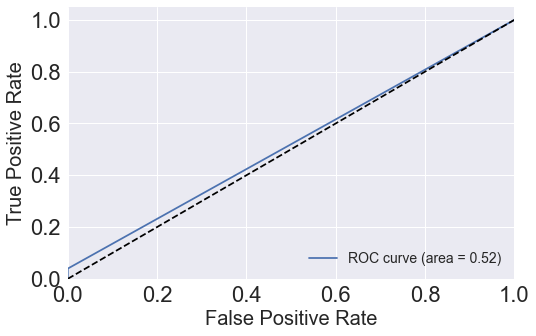

In [65]:
plt.figure(figsize=(8, 5))
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % (roc_auc2))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(rfc, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8398 (+/- 0.01)
F1-score: 0.5196 (+/- 0.09)


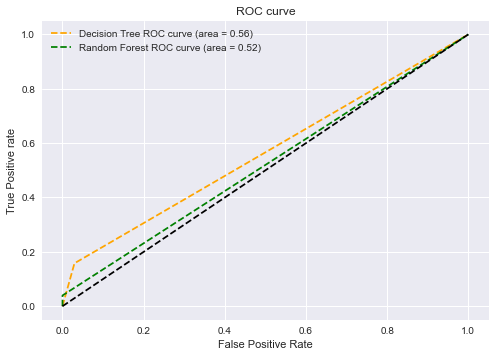

In [67]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree ROC curve (area = %0.2f)' % (roc_auc1))
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest ROC curve (area = %0.2f)' % (roc_auc2))
plt.plot([0, 1], [0, 1], 'k--')

#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [108]:
scaler = StandardScaler()
dk = scaler.fit_transform(dk)
dk = pd.DataFrame(dk, columns = [['Age', 'Attrition' , 'Department', 'DistanceFromHome' , 'EducationField' , 'EnvironmentSatisfaction' , 'Gender' , 'JobInvolvement' , 'JobRole' , 'JobSatisfaction' , 'MaritalStatus' , 'MonthlyIncome' , 'NumCompaniesWorked' , 'OverTime' , 'PercentSalaryHike' , 'PerformanceRating' , 'RelationshipSatisfaction' , 'StockOptionLevel' , 'TotalWorkingYears' , 'TrainingTimesLastYear', 'WorkLifeBalance',  'YearsAtCompany', 'YearsSinceLastPromotion' , 'YearsWithCurrManager']])

scaler = StandardScaler()
dk1 = scaler.fit_transform(dk1)
dk1 = pd.DataFrame(dk1, columns = [['Age', 'Attrition' , 'Department', 'DistanceFromHome' , 'EducationField' , 'EnvironmentSatisfaction' , 'Gender' , 'JobInvolvement' , 'JobRole' , 'JobSatisfaction' , 'MaritalStatus' , 'MonthlyIncome' , 'NumCompaniesWorked' , 'OverTime' , 'PercentSalaryHike' , 'PerformanceRating' , 'RelationshipSatisfaction' , 'StockOptionLevel' , 'TotalWorkingYears' , 'TrainingTimesLastYear', 'WorkLifeBalance',  'YearsAtCompany', 'YearsSinceLastPromotion' , 'YearsWithCurrManager']])


In [109]:
df

Age  Attrition              Department  DistanceFromHome    EducationField  EnvironmentSatisfaction  Gender  JobInvolvement                JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager
0     52.00000000000000000000          0  Research & Development                 9           Medical                        2    Male               3      Research Director                3        Single         8446.0                   9         0                 17                3.0                         3                 0                 20  2.00000000000000000000                2             8.0                        2                    13
1     36.00000000000000000000          0  Research & Development                 1     Life Sciences                        2    Male               3                Manager                3      Divorced         4834.0                   1         1                 14                3.0                         3                 1                 21  3.00000000000000000000                3             1.0                        1                     6
2     36.67441860465116576506          0                   Sales                16     Life Sciences                        3    Male               3        Sales Executive                4      Divorced         4768.0                   1         1                 25                3.0                         3                 1                  7  4.00000000000000000000                3             1.0                        1                     2
3     33.00000000000000000000          0  Research & Development                 5  Technical Degree                        2    Male               3     Research Scientist                2        Single         2799.0                   2         0                 14                3.0                         2                 0                 12  1.00000000000000000000                3             3.0                        0                     7
4     37.41758241758241609887          0  Research & Development                 9     Life Sciences                        3  Female               3  Laboratory Technician                4        Single         7978.0                   1         0                 12                3.0                         3                 0                  2  2.76704545454545458583                3            10.0                        2                     1
...                       ...        ...                     ...               ...               ...                      ...     ...             ...                    ...              ...           ...            ...                 ...       ...                ...                ...                       ...               ...                ...                     ...              ...             ...                      ...                   ...
1171  37.00000000000000000000          0  Research & Development                16           Medical                        4  Female               4  Laboratory Technician                4      Divorced         2115.0                   1         1                 13                3.0                         2                 2                  1  3.00000000000000000000                2            17.0                        0                     0
1172  33.00000000000000000000          1                   Sales                 6     Life Sciences                        2  Female               1        Sales Executive                3       Married         5147.0                   4         1                 18                3.0                         2                 0                 12  2.00000000000000000000                2    

In [110]:
X = dk.drop(columns = 'Attrition')
y = df[['Attrition']]

X_train, y_train = (X, y)

In [111]:
X1 = dk1.drop(columns = 'Attrition')
y1 = df1[['Attrition']]

X_test, y_test = (X1, y1)

In [112]:
y

Attrition
0             0
1             0
2             0
3             0
4             0
...         ...
1171          0
1172          1
1173          0
1174          0
1175          0

[1079 rows x 1 columns]

In [119]:
param_list = {
    'n_neighbors' : list(range(1, 30)),
    'algorithm': ['ball_tree', 'kd_tree','brute'],
    'weights': ['distance','uniform'],
    'leaf_size' : list(range(1, 150)),
    'metric' : ['euclidean' , 'cosine', 'minkowski']
}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(knn,param_distributions=param_list, n_iter=50, cv = 3)
random_search.fit(X, y)
report_verbose(random_search.cv_results_, n_top=7)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a callable functio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Model with rank: 1
Mean validation score: 0.840 (std: 0.005)
Model with rank: 1
Parameters: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'minkowski', 'leaf_size': 113, 'algorithm': 'ball_tree'}

Model with rank: 1
Mean validation score: 0.840 (std: 0.005)
Model with rank: 1
Parameters: {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'minkowski', 'leaf_size': 45, 'algorithm': 'ball_tree'}

Model with rank: 3
Mean validation score: 0.837 (std: 0.001)
Model with rank: 3
Parameters: {'weights': 'uniform', 'n_neighbors': 8, 'metric': 'euclidean', 'leaf_size': 138, 'algorithm': 'ball_tree'}

Model with rank: 4
Mean validation score: 0.837 (std: 0.005)
Model with rank: 4
Parameters: {'weights': 'distance', 'n_neighbors': 10, 'metric': 'minkowski', 'leaf_size': 78, 'algorithm': 'ball_tree'}

Model with rank: 5
Mean validation score: 0.837 (std: 0.007)
Model with rank: 5
Parameters: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'euclidean', 'leaf_size': 126, 'algorithm': 'ball_tr

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was

In [120]:
clf = random_search.best_estimator_
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

<ipython-input-120-0e19a39f32c1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf = clf.fit(X_train, y_train)


In [121]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))



print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Train Accuracy 1.0
Train F1-score [1. 1.]
Test Accuracy 0.8475836431226765
Test F1-score [0.91615542 0.16326531]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       227
           1       0.57      0.10      0.16        42

    accuracy                           0.85       269
   macro avg       0.71      0.54      0.54       269
weighted avg       0.81      0.85      0.80       269



array([[224,   3],
       [ 38,   4]])

In [122]:
fpr3, tpr3, _ = roc_curve(y_test, y_pred)
roc_auc3 = auc(fpr3, tpr3)
print(roc_auc3)

roc_auc3 = roc_auc_score(y_test, y_pred, average=None)
roc_auc3

0.5410111181036292


0.5410111181036292

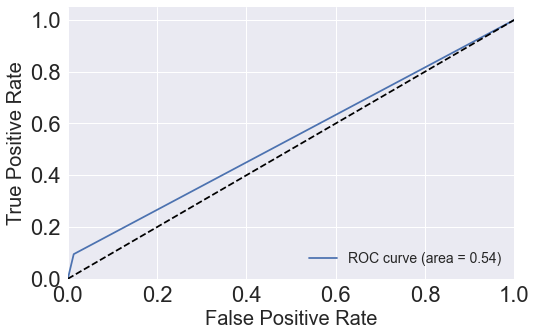

In [123]:
plt.figure(figsize=(8, 5))
plt.plot(fpr3, tpr3, label='ROC curve (area = %0.2f)' % (roc_auc3))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

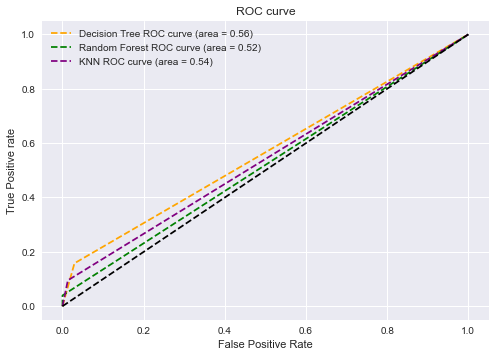

In [124]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree ROC curve (area = %0.2f)' % (roc_auc1))
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest ROC curve (area = %0.2f)' % (roc_auc2))
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label='KNN ROC curve (area = %0.2f)' % (roc_auc3))
plt.plot([0, 1], [0, 1], 'k--')

#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()